In [1]:
import numpy as np
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt
from fourbranches import f_h
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
plt.rcParams.update({'font.size': 16})

# Plot the func

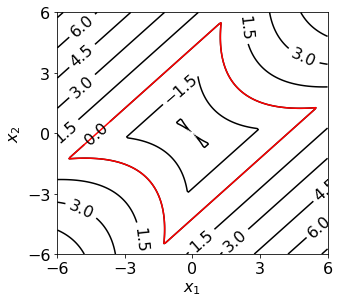

In [3]:
x = np.linspace(-6, 6, 201)
y = np.linspace(-6, 6, 201)
meshx, meshy = np.meshgrid(x,y)
mesh_array = np.concatenate((meshx.reshape(-1,1), meshy.reshape(-1,1)), axis=1)
meshf = f_h(mesh_array).reshape(meshx.shape)

plt.figure(figsize=(5,4.5))
axes = plt.contour(meshx, meshy, meshf, colors='black', linestyles='solid')
plt.contour(meshx, meshy, meshf, levels=[0], colors='red', linestyles='solid')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks([-6, -3, 0, 3, 6])
plt.yticks([-6, -3, 0, 3, 6])
plt.clabel(axes)
plt.tight_layout()
plt.savefig('contour.pdf')
plt.show()

# Plot the results

In [4]:
results = np.load('results.npy')
# Transfer p_a to p_e
results = 1 - results

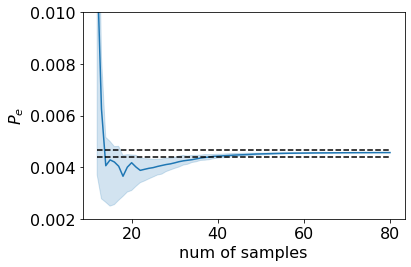

In [6]:
plt.figure()

plt.plot(np.arange(12, 12 + 69), np.mean(results, axis=0))
plt.fill_between(np.arange(12, 12 + 69), np.percentile(results, 15, axis=0),
                 np.percentile(results, 85, axis=0),
                 alpha=0.2, color='tab:blue')

plt.plot(np.arange(12, 12 + 69), [0.00454 * 1.03] * 69, 'k--')
plt.plot(np.arange(12, 12 + 69), [0.00454 * 0.97] * 69, 'k--')
plt.xlabel('num of samples')
plt.ylabel('$P_e$')
plt.ylim(0.002,0.01)
plt.tight_layout()
plt.savefig('convergence.pdf')
plt.show()